<a href="https://colab.research.google.com/github/rizukiii12/sentiment-analisis-twitter/blob/main/all_eyes_on_rafah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# !pip install deep_translator -q
# !pip install langdetect -q
!pip install nltk.sentiment.vader -q
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')
!pip install vaderSentiment -q

ERROR: Could not find a version that satisfies the requirement nltk.sentiment.vader (from versions: none)
ERROR: No matching distribution found for nltk.sentiment.vader
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import re
from deep_translator import GoogleTranslator
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# Memuat data
file_path = 'all-eyes-on-rafah.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

# Melihat informasi umum tentang data
data.info()

# Melihat beberapa baris pertama dari data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1188 non-null   object
dtypes: object(1)
memory usage: 9.4+ KB


,text
0,Pernah ga sih lo online X jam 3 pagi cuma buat...
1,Selamat kepada pemenang Modal receh JP gede......
2,bank Weh plis make over itu juga bagus bgt ges...
3,posting all eyes on rafah di ig story lu ga gu...
4,All Eyes on rafah


In [7]:
# Inisialisasi lemmatizer dan stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fungsi pre-processing teks
def preprocess_text(text):
    # Tokenisasi
    words = word_tokenize(text)

    # Konversi ke lower case dan lemmatization
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum()]

    # Menghapus stopwords
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Menerapkan pre-processing ke kolom teks
data['clean_text'] = data['text'].apply(preprocess_text)

In [8]:
# Fungsi deteksi bahasa
def detect_language(text):
    try:
        return detect(text)
    except:
        remove_emojis = re.sub(r'[^\w\s]', '', text)
        return detect(remove_emojis)

# Fungsi terjemahan teks
def translate_text(text, source='auto', target='en'):
    try:
        if source != target:
            text = GoogleTranslator(source=source, target=target).translate(text)
        return text
    except Exception as e:
        print(f"Translation error: {str(e)}")
        return text

# Mendeteksi dan menerjemahkan teks
data['language'] = data['text'].apply(detect_language)
data['translated_text'] = data.apply(lambda row: translate_text(row['text'], source=row['language'], target='en'), axis=1)

# Pre-processing teks
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['clean_text'] = data['translated_text'].apply(preprocess_text)

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to label sentiment
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    score = scores['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the labeling function to the data
data['sentiment'] = data['text'].apply(analyze_sentiment)


# Display the first few rows of the labeled data
print(data.head())

                                                text  \
0  Pernah ga sih lo online X jam 3 pagi cuma buat...   
1  Selamat kepada pemenang Modal receh JP gede......   
2  bank Weh plis make over itu juga bagus bgt ges...   
3  posting all eyes on rafah di ig story lu ga gu...   
4                                  All Eyes on rafah   

                                          clean_text language  \
0     ever online x 3 morning dog israhell eye rafah       id   
1  congratulation winner jp big change capital wi...       id   
2  bank weh please make also good ge confused rep...       id   
3  posting eye rafah di ig story lu ga guna bang ...       tl   
4                                          eye rafah       cy   

                                     translated_text sentiment  
0  Have you ever been online X at 3 in the mornin...   neutral  
1  Congratulations to the winners of JP's big cha...  positive  
2  bank Weh please make over is also very good ge...   neutral  
3  posting a

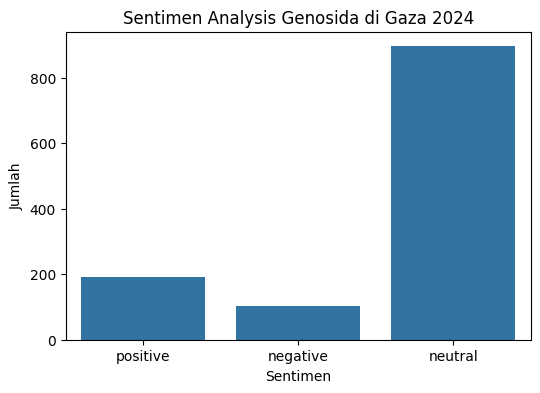

In [21]:
# # Visualisasi distribusi sentimen
# plt.figure(figsize=(4, 4))
# sns.countplot(x='sentiment', data=data, order=['positive', 'negative'])
# plt.title('Sentimen analysis genoside in gaza 2024')
# plt.xlabel('Sentimen')
# plt.ylabel('Jumlah')
# plt.show()

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data, order=['positive', 'negative', 'neutral'])
plt.title('Sentimen Analysis Genosida di Gaza 2024')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [17]:
!pip install tfidf_vectorizer

ERROR: Could not find a version that satisfies the requirement tfidf_vectorizer (from versions: none)
ERROR: No matching distribution found for tfidf_vectorizer


In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate the logistic regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

# Print the evaluation results
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Logistic Regression Classification Report:\n", report_log_reg)
print("\nNaive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)

Logistic Regression Accuracy: 0.7983193277310925
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        19
     neutral       0.79      0.99      0.88       180
    positive       0.86      0.31      0.45        39

    accuracy                           0.80       238
   macro avg       0.55      0.43      0.44       238
weighted avg       0.74      0.80      0.74       238


Naive Bayes Accuracy: 0.773109243697479
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        19
     neutral       0.77      0.99      0.87       180
    positive       0.75      0.15      0.26        39

    accuracy                           0.77       238
   macro avg       0.51      0.38      0.37       238
weighted avg       0.71      0.77      0.70       238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif